In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#from matplotlib import rc
import requests as rq
from __future__ import unicode_literals
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600
plt.rcParams['font.sans-serif']=['SimSun']
plt.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in' 
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rcParams['text.latex.preamble'] = [
    '\\usepackage{CJK}',
    r'\AtBeginDocument{\begin{CJK}{UTF8}{gbsn}}',
    r'\AtEndDocument{\end{CJK}}',
]
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

<ipython-input-2-948f888d2492>:15: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  matplotlib.rcParams['text.latex.unicode'] = True


In [2]:
web = rq.get("https://www.efunda.com/materials/elements/TC_Table.cfm?Element_ID=Si")
dfs = pd.read_html(web.text)

In [12]:
si_tc = dfs[3]
si_tc.drop(index=0,inplace=True)

In [19]:
si_tc.drop(index=1,inplace=True)

In [17]:
si_tc.rename(columns={0:'Temperature(K)',1:'Pressure(Pa)',2:'Thermal Conductivity'},inplace=True)

In [20]:
si_tc.head()

,Temperature(K),Pressure(Pa),Thermal Conductivity
2,1,101325,6.93
3,2,101325,45.4
4,3,101325,138
5,4,101325,297
6,5,101325,527


In [24]:
si_tc.set_index('Temperature(K)',inplace=True)

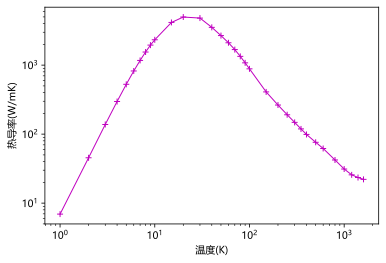

In [93]:
tc = pd.to_numeric(si_tc['Thermal Conductivity'])
y = tc.to_list()
x = tc.index.astype(float).to_list()
plt.loglog(x,y,'m-',linewidth=1)
plt.loglog(x,y,'m+')
plt.xlabel('温度(K)')
plt.ylabel('热导率(W/mK)')
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [2]:
cut_ene = pd.DataFrame([i-43.22 for i in [-0.000338,-0.101050,-0.155293,-0.171120,-0.178534,-0.179486,-0.179376]],np.array(np.arange(200,501,50)))

In [3]:
cut_ene.rename(columns={0:'总能量'},inplace=True)

In [4]:
cut_ene

,总能量
200,-43.220338
250,-43.321050
300,-43.375293
350,-43.391120
400,-43.398534
450,-43.399486
500,-43.399376


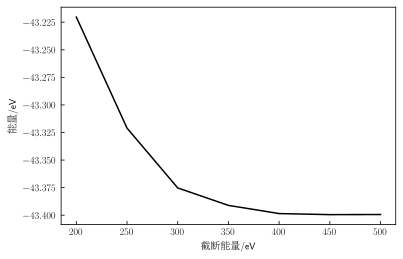

In [95]:
cut_ene.plot(color='k',legend='')
plt.xlabel('截断能量/eV')
plt.ylabel('能量/eV')
plt.savefig('/home/thoughts/git/thesis/fini-thesis/fig/cut-ene.png',bbox_inches='tight')
plt.show()

In [26]:
k_ene = pd.DataFrame([-43.379475,-43.398626,-43.399453,-43.399491,-43.399493],np.array(np.arange(4,13,2)))

In [27]:
k_ene.rename(columns={0:'能量'},inplace=True)

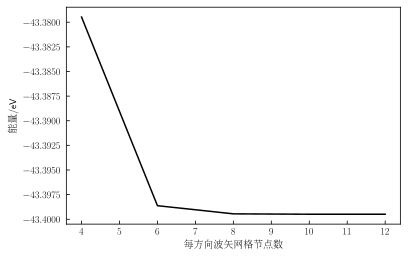

In [94]:
k_ene.plot(color='k',legend='')
plt.xlabel('每方向波矢网格节点数')
plt.ylabel('能量/eV')
plt.savefig('/home/thoughts/git/thesis/fini-thesis/fig/k-ene.png',bbox_inches='tight')
#plt.legend('total energy',loc='best')
plt.show()

In [ ]:
5.30   -42.968477
5.34   -43.154564
5.38   -43.285813
5.42   -43.365873
5.46   -43.398229
5.50   -43.386254
5.54   -43.332929
5.58   -43.241342
5.62   -43.114322
5.66   -42.954578
5.70   -42.764700
5.74   -42.547132
5.78   -42.304215
5.82   -42.038127
5.86   -41.750968
5.90   -41.444806

In [30]:
a_ene = pd.DataFrame([-42.968477,-43.154564,-43.285813,-43.365873,-43.398229,-43.386254,-43.332929,-43.241342,-43.114322,-42.954578,-42.764700,-42.547132,-42.304215,-42.038127,-41.750968,-41.444806],np.array(np.arange(5.30,5.91,0.04)))

In [52]:
a_ene.rename(columns={0:'能量'},inplace=True)

In [74]:
ene = a_ene['能量']

In [72]:
ene

5.30   -42.968477
5.34   -43.154564
5.38   -43.285813
5.42   -43.365873
5.46   -43.398229
5.50   -43.386254
5.54   -43.332929
5.58   -43.241342
5.62   -43.114322
5.66   -42.954578
5.70   -42.764700
5.74   -42.547132
5.78   -42.304215
5.82   -42.038127
5.86   -41.750968
5.90   -41.444806
Name: 能量, dtype: float64

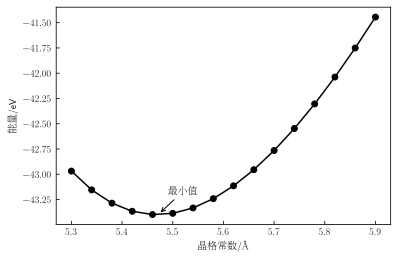

In [93]:
a_ene.plot(color='k',legend='')
plt.xlabel(r'晶格常数/$\mathrm \AA$')
plt.ylabel('能量/eV')
plt.scatter(np.arange(5.30,5.90,0.04),ene,color='k')
plt.annotate("最小值",xy=(5.473,-43.39),xytext=(5.49,-43.2),arrowprops=dict(arrowstyle='->',connectionstyle='arc3'))
plt.savefig('/home/thoughts/git/thesis/fini-thesis/fig/a-ene.png',bbox_inches='tight')
#plt.legend('total energy',loc='best')

plt.show()

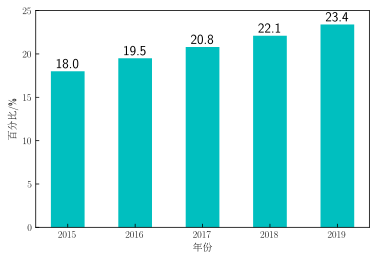

In [17]:
plt.bar(np.arange(2015,2020,1),[18.0,19.5,20.8,22.1,23.4],fc='c',width=0.5)
plt.xlabel('年份')
plt.ylabel('百分比/\%')
plt.ylim(0,25)
for a,b in zip(np.arange(2015,2020,1),[18.0,19.5,20.8,22.1,23.4]):
    plt.text(a, b+0.05, b, ha='center', va= 'bottom',fontsize=14) 
plt.savefig('/home/thoughts/git/thesis/fini-thesis/fig/clean-ene-prc.png',bbox_inches='tight')
plt.show()

In [3]:
np.arange(1,3,1)

array([1, 2])